# 2023-09-01 10 - Results Electricity Multimodel Statinformed no-es.ipynb
Copy of notebook 7 but for electricity dataset

## Fetching runs

In [3]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
    
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"

experiment_tags = ["e2_electricity_10e_statinformed"]

# get all runs that both: 1.  match any experiment tag and 2. are finished
runs = api.runs(f"{workspace}/{project}",
                {"$and": [
                    {"tags": {"$in": experiment_tags}},
                    {"state": "finished"}
                ]})

all_runs = []
run_counter = 0
for run in tqdm(runs):
    run_counter += 1
    for split in ["train", "test"]:
        for metric in ["mse",]:
            pred_len = run.config["pred_len"]
            metrics = np.zeros(pred_len)
            for i in range(pred_len):
                run_dict = {**run.config}
                #run_dict["constraint_level"] = constraint_level
                run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                #run_dict[f"{metric}"] = run.summary.get(f"{metric}/{split}/{i}",run.summary.get(f"mse/{split}/{i}",np.nan)) #god forgive me for this line
                run_dict["step"]=i
                run_dict["epoch"]=run.summary["epoch"]
                run_dict["infeasible_rate"]=run.summary[f"infeasible_rate/{split}"]
                run_dict["split"] = split
                run_dict["run_id"] = run.id
                # Get either Constrained/ or ERM/ from the run name, then append model name.
                #print("run.name", run.name)
                #debug if ERM run
                run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                run_dict["sweep_id"] = run.sweep.id
                #print("Algorithm", run_dict["Algorithm"])

                # To better plot constrained vs ERM
                #TODO this is a hack while I consolidate the tags. 
                run_dict["type"] = "ERM" if run.config['dual_lr'] == 0 else "Constrained"

                all_runs.append(run_dict)
print(f"Fetched {run_counter} runs")
df = pd.DataFrame(all_runs)
print(f"Total records: {(df.shape)}")

100%|██████████| 32/32 [00:00<00:00, 156.56it/s]


Fetched 32 runs
Total records: (21504, 60)


There should be 3 runs per model, per pred length (3 x 2 x 4 = 24), plus ERM runs: 2 per model per pred_len (2 x 4 = 8) Total 32. 

In [4]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len','epoch']].drop_duplicates().sort_values(["pred_len",'Algorithm','model',"constraint_level"])

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len,epoch
15936,iij1xyjo,jk3es6p9,Electricity-StatInformed-10e-Constrained Autof...,Autoformer,0.157,96,10
15552,4a1mgu20,jk3es6p9,Electricity-StatInformed-10e-Constrained Autof...,Autoformer,0.169,96,10
15168,a38bewyi,jk3es6p9,Electricity-StatInformed-10e-Constrained Autof...,Autoformer,0.170,96,10
15744,wegbe0c2,jk3es6p9,Electricity-StatInformed-10e-Constrained Reformer,Reformer,0.157,96,10
15360,avemcc84,jk3es6p9,Electricity-StatInformed-10e-Constrained Reformer,Reformer,0.169,96,10
14976,9fxbkwdh,jk3es6p9,Electricity-StatInformed-10e-Constrained Reformer,Reformer,0.170,96,10
21312,dky72mnn,plrzt70h,StatInformed-ERM-10e Autoformer,Autoformer,-1.000,96,10
18624,ox5mkx6s,plrzt70h,StatInformed-ERM-10e Reformer,Reformer,-1.000,96,10
14592,cw2jjq6t,iyxf4btd,Electricity-StatInformed-10e-Constrained Autof...,Autoformer,0.173,192,10
13824,nd30tuq8,iyxf4btd,Electricity-StatInformed-10e-Constrained Autof...,Autoformer,0.184,192,10


## Plots

[ 0.17   0.169  0.157 -1.   ]


### pred_len: 96 constraint_level: 0.17

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.00,StatInformed-ERM-10e Autoformer,10,96
1,96,-1.00,StatInformed-ERM-10e Reformer,10,96
2,96,0.17,Electricity-StatInformed-10e-Constrained Autof...,10,96
3,96,0.17,Electricity-StatInformed-10e-Constrained Reformer,10,96


type,model,Constrained,ERM
0,Autoformer,0.164824,0.164254
1,Reformer,0.201000,0.202803


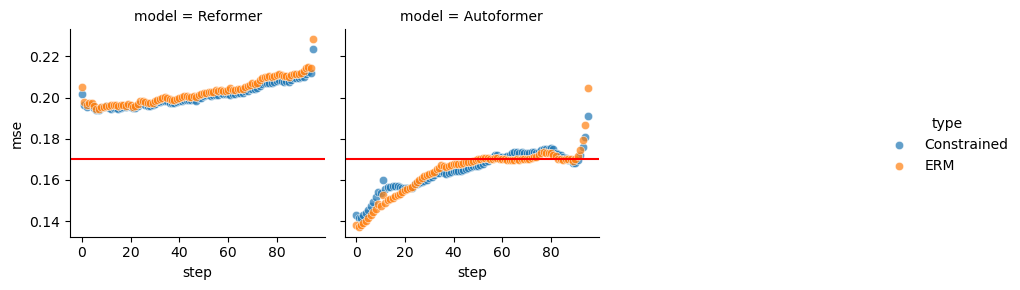

### pred_len: 96 constraint_level: 0.169

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,10,96
1,96,-1.000,StatInformed-ERM-10e Reformer,10,96
2,96,0.169,Electricity-StatInformed-10e-Constrained Autof...,10,96
3,96,0.169,Electricity-StatInformed-10e-Constrained Reformer,10,96


type,model,Constrained,ERM
0,Autoformer,0.165845,0.164254
1,Reformer,0.200893,0.202803


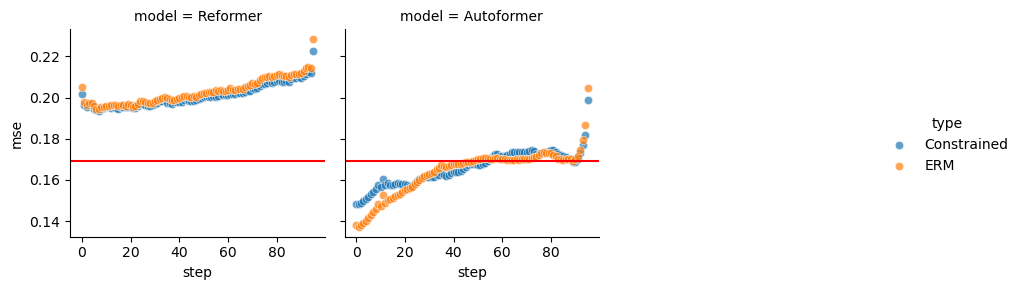

### pred_len: 96 constraint_level: 0.157

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,10,96
1,96,-1.000,StatInformed-ERM-10e Reformer,10,96
2,96,0.157,Electricity-StatInformed-10e-Constrained Autof...,10,96
3,96,0.157,Electricity-StatInformed-10e-Constrained Reformer,10,96


type,model,Constrained,ERM
0,Autoformer,0.16279,0.164254
1,Reformer,0.20033,0.202803


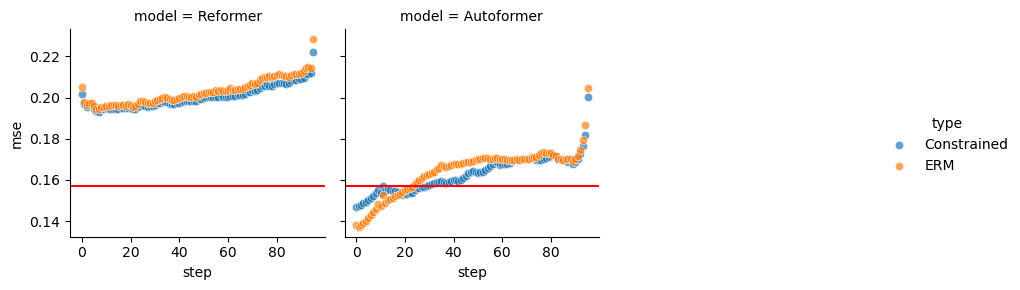

[ 0.2    0.184  0.173 -1.   ]


### pred_len: 192 constraint_level: 0.2

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.0,StatInformed-ERM-10e Autoformer,6,192
1,192,-1.0,StatInformed-ERM-10e Reformer,8,192
2,192,0.2,Electricity-StatInformed-10e-Constrained Autof...,10,192
3,192,0.2,Electricity-StatInformed-10e-Constrained Reformer,10,192


type,model,Constrained,ERM
0,Autoformer,0.193586,0.187220
1,Reformer,0.236426,0.236125


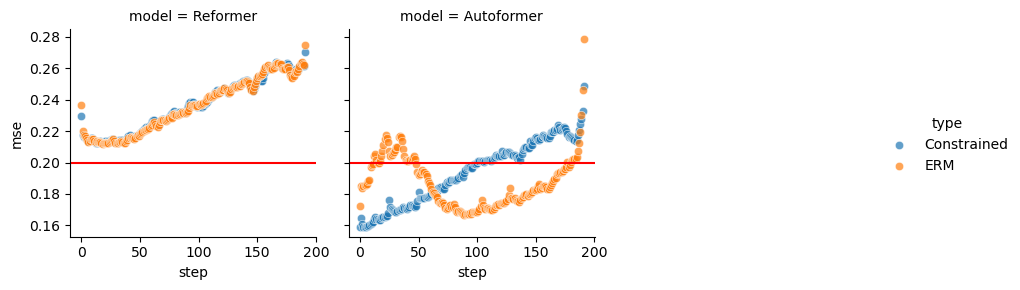

### pred_len: 192 constraint_level: 0.184

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,6,192
1,192,-1.000,StatInformed-ERM-10e Reformer,8,192
2,192,0.184,Electricity-StatInformed-10e-Constrained Autof...,10,192
3,192,0.184,Electricity-StatInformed-10e-Constrained Reformer,10,192


type,model,Constrained,ERM
0,Autoformer,0.188901,0.187220
1,Reformer,0.234136,0.236125


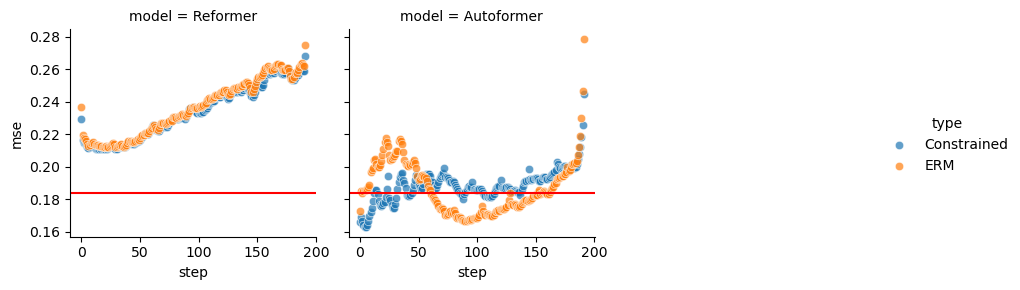

### pred_len: 192 constraint_level: 0.173

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,6,192
1,192,-1.000,StatInformed-ERM-10e Reformer,8,192
2,192,0.173,Electricity-StatInformed-10e-Constrained Autof...,10,192
3,192,0.173,Electricity-StatInformed-10e-Constrained Reformer,10,192


type,model,Constrained,ERM
0,Autoformer,0.191431,0.187220
1,Reformer,0.232946,0.236125


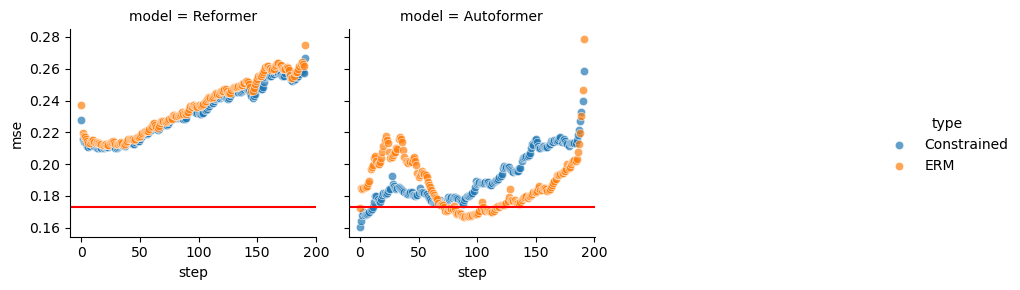

[ 0.256  0.245  0.232 -1.   ]


### pred_len: 336 constraint_level: 0.256

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.000,StatInformed-ERM-10e Reformer,10,336
2,336,0.256,Electricity-StatInformed-10e-Constrained Autof...,10,336
3,336,0.256,Electricity-StatInformed-10e-Constrained Reformer,10,336


type,model,Constrained,ERM
0,Autoformer,0.189484,0.246344
1,Reformer,0.241597,0.237727


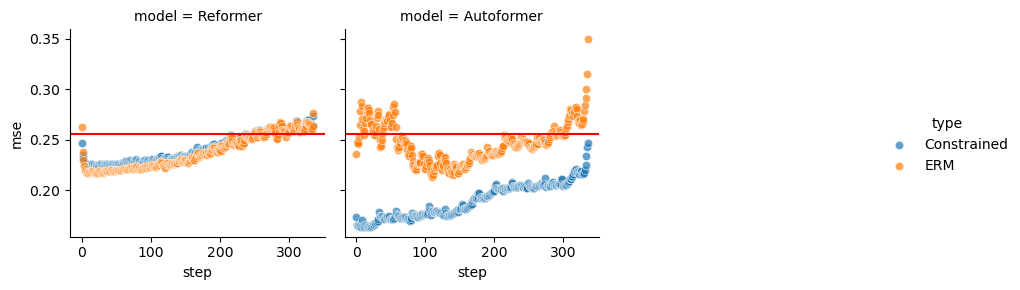

### pred_len: 336 constraint_level: 0.245

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.000,StatInformed-ERM-10e Reformer,10,336
2,336,0.245,Electricity-StatInformed-10e-Constrained Autof...,10,336
3,336,0.245,Electricity-StatInformed-10e-Constrained Reformer,10,336


type,model,Constrained,ERM
0,Autoformer,0.192213,0.246344
1,Reformer,0.240461,0.237727


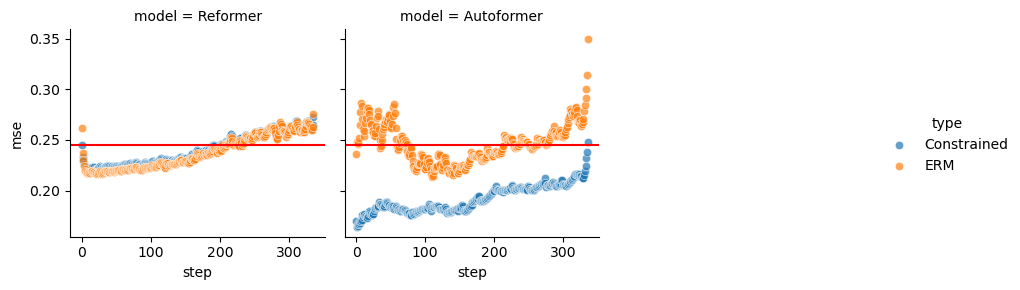

### pred_len: 336 constraint_level: 0.232

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.000,StatInformed-ERM-10e Reformer,10,336
2,336,0.232,Electricity-StatInformed-10e-Constrained Autof...,10,336
3,336,0.232,Electricity-StatInformed-10e-Constrained Reformer,10,336


type,model,Constrained,ERM
0,Autoformer,0.191880,0.246344
1,Reformer,0.239782,0.237727


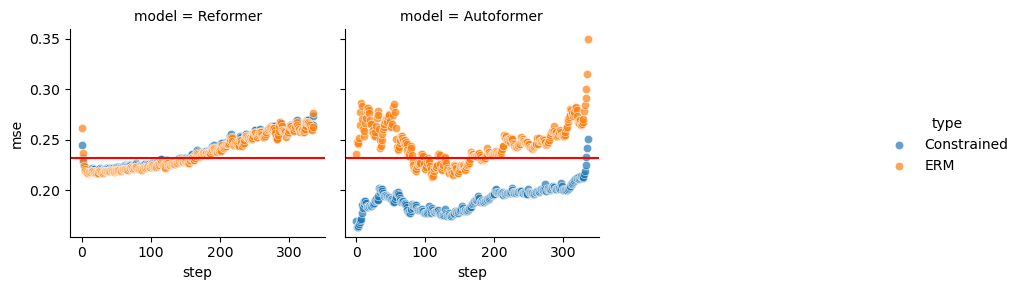

[ 0.246  0.23   0.215 -1.   ]


### pred_len: 720 constraint_level: 0.246

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.000,StatInformed-ERM-10e Autoformer,5,720
1,720,-1.000,StatInformed-ERM-10e Reformer,10,720
2,720,0.246,Electricity-StatInformed-10e-Constrained Autof...,10,720
3,720,0.246,Electricity-StatInformed-10e-Constrained Reformer,10,720


type,model,Constrained,ERM
0,Autoformer,0.239298,0.244733
1,Reformer,0.256478,0.252782


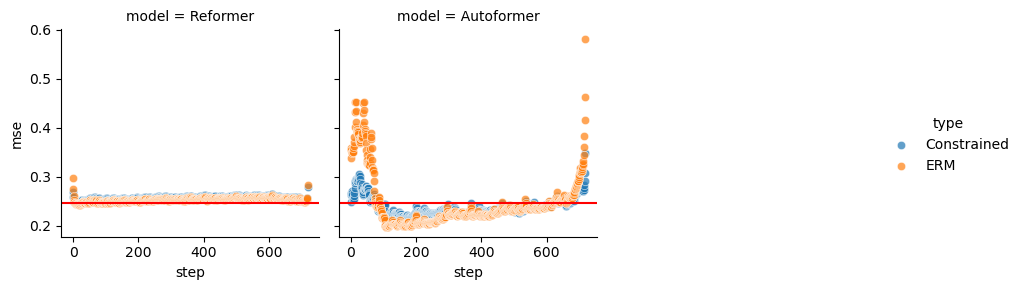

### pred_len: 720 constraint_level: 0.23

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.00,StatInformed-ERM-10e Autoformer,5,720
1,720,-1.00,StatInformed-ERM-10e Reformer,10,720
2,720,0.23,Electricity-StatInformed-10e-Constrained Autof...,10,720
3,720,0.23,Electricity-StatInformed-10e-Constrained Reformer,10,720


type,model,Constrained,ERM
0,Autoformer,0.266884,0.244733
1,Reformer,0.253675,0.252782


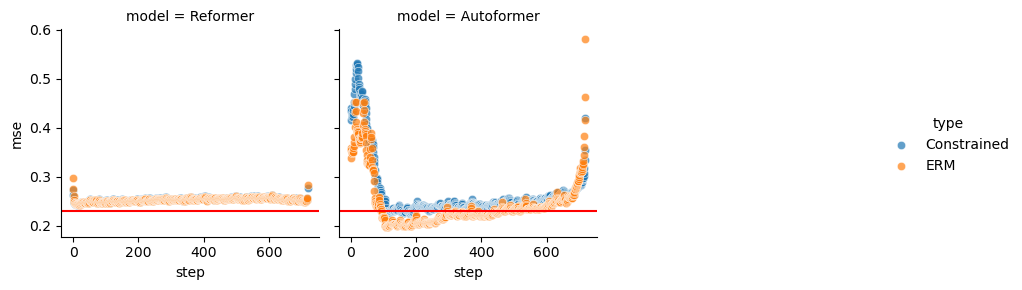

### pred_len: 720 constraint_level: 0.215

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.000,StatInformed-ERM-10e Autoformer,5,720
1,720,-1.000,StatInformed-ERM-10e Reformer,10,720
2,720,0.215,Electricity-StatInformed-10e-Constrained Autof...,10,720
3,720,0.215,Electricity-StatInformed-10e-Constrained Reformer,10,720


type,model,Constrained,ERM
0,Autoformer,0.264881,0.244733
1,Reformer,0.252839,0.252782


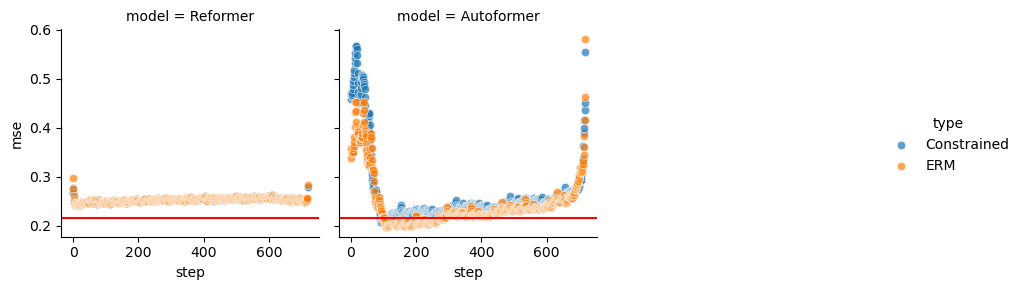

In [14]:
to_plot = df[df.split=='test']# just see test to unclutter
#to_plot=df
for (pred_len), series in to_plot.groupby(["pred_len"]):
    constraints = series.constraint_level.unique()
    print(constraints)
    constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
    for constraint_level in constraints:
        display(Markdown(f"### pred_len: {pred_len} constraint_level: {constraint_level}"))
        plot_series = series[series["constraint_level"].isin([constraint_level,-1])] # The -1 adds the ERM baseline.

        display(plot_series.groupby(['pred_len','constraint_level','Algorithm','epoch']).size().reset_index())
        means_per_experiment = plot_series.groupby(['pred_len','constraint_level','Algorithm','model','epoch','type'])['mse'].mean().reset_index()
        #display(means_per_experiment)
        # do a pivot where model are the rows, and the columns constrained and unconstrained
        display(means_per_experiment.pivot(index=['model'], columns='type', values='mse').reset_index())

        # sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        
        # plt.axhline(y=constraint_level, color='r', linestyle='-')
        # plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        # plt.show()

        # This same scatterplot but in a grid by algorithm. 
        g = sns.FacetGrid(plot_series, col="model", hue="type",col_wrap=3)
        g.map(sns.scatterplot, "step", "mse", alpha=.7) 
        g.add_legend()
        # add the hline
        for ax in g.axes:
            ax.axhline(y=constraint_level, color='r', linestyle='-')
        plt.show()


## Explore how to compute constraint violations

In [17]:
to_plot.shape

(10752, 60)

In [46]:
# query where pred_length=96,model=Autoformer,constraint_level=0.157
#TODO fix this. 
for pl in [96,168,336,720]:
    tp2=to_plot[(to_plot.pred_len==pl)].copy()
    erm_baseline=to_plot[(to_plot.pred_len==pl) & (to_plot.constraint_level==-1)]
    # Concat with the ERM baseline
    tp2=pd.concat([tp2,erm_baseline],axis=0)
    # Compute 'infeasible amount' as the difference between the mse and the constraint_level, 0 if mse < constraint
    tp2['mse_diff']=tp2.apply(lambda x: max(0,x['mse']-x['constraint_level']),axis=1)


    grouped_values=tp2.groupby(['pred_len','constraint_level','Algorithm','model','epoch','type'])[['mse','mse_diff']].mean().reset_index()

    # Pivot of models versus constrained and ERM, values are mse and mse_diff
    display(grouped_values.pivot(index=['model','pred_len'], columns='type', values=['mse','mse_diff']).reset_index())


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# to_plot = df[df.split=='test']# just see test to unclutter
# #to_plot=df
# for (pred_len), series in to_plot.groupby(["pred_len"]):
#     constraints = series.constraint_level.unique()
#     print(constraints)
#     constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
#     for constraint_level in constraints:
#         display(Markdown(f"### pred_len: {pred_len} constraint_level: {constraint_level}"))
#         plot_series = series[series["constraint_level"].isin([constraint_level,-1])] # The -1 adds the ERM baseline.

#         display(plot_series.groupby(['pred_len','constraint_level','Algorithm','epoch']).size().reset_index())
#         means_per_experiment = plot_series.groupby(['pred_len','constraint_level','Algorithm','model','epoch','type'])['mse'].mean().reset_index()
#         #display(means_per_experiment)
#         # do a pivot where model are the rows, and the columns constrained and unconstrained
#         display(means_per_experiment.pivot(index=['model'], columns='type', values='mse').reset_index())

#         # sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        
#         # plt.axhline(y=constraint_level, color='r', linestyle='-')
#         # plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
#         # plt.show()

#         # This same scatterplot but in a grid by algorithm. 
#         g = sns.FacetGrid(plot_series, col="model", hue="type",col_wrap=3)
#         g.map(sns.scatterplot, "step", "mse", alpha=.7) 
#         g.add_legend()
#         # add the hline
#         for ax in g.axes:
#             ax.axhline(y=constraint_level, color='r', linestyle='-')
#         plt.show()
